In [ ]:
first_cost = 50       # 一志愿成本
second_cost = 20      # 二志愿成本
third_cost = 1        # 三志愿成本

total_student = 200   # 对课程感兴趣的学生总人数
max_student = 50      # 课程的最大课容量
average_reward = 30   # 课程的平均奖励

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个长度为total_student的随机数组，每个元素为以average_reward为中心的正态分布
rewards = np.random.normal(average_reward, 26, total_student)

print(rewards)

[ 46.18450348  30.4844386   25.06066007  15.67279059  17.02840526
  68.86307402  44.23240018  12.358324    -1.62203915  34.45255049
   3.90856411  42.12892826 -10.49554715  25.59626661  27.44270129
  53.46199467  67.10123995  74.56864896  35.21607287  50.53186953
  52.91357388  37.80771832  53.53674366  36.13616771   3.19730765
  64.53469407  43.11687044  -0.63501294  26.71251826  51.29860063
   5.60426075  66.34877981   4.2308772   82.00664855  -0.18669594
  -0.46143094  39.45551266  37.62586038  21.12969523  14.39028758
  38.79405743  42.86467314  57.07189712  60.27152311  -0.87156867
 -18.96381809  45.5356582    2.86112659  42.25491709  57.31976524
 -20.54109754   6.7525933   42.16275745  47.77140762   1.36643754
  16.83763521  39.22663867  11.52120544   1.81078664  25.02990153
  38.98333946  -9.45421567  -2.96662861  32.12332111  55.49332483
 -11.53292558 -27.84809865 -44.2571586   29.40675859  10.07002482
   9.24848826  30.55349586  35.73635528  30.31507335  28.42648296
  34.00790

In [ ]:
first_student = 0
second_student = 0
third_student = 0

first_student_change = 0
second_student_change = 0
third_student_change = 0

# 定义生成一个长度为total_student的数组，每个元素初始值为0
choices = np.zeros(total_student)
# 0代表学生没有投放志愿，1代表一志愿，2代表二志愿，3代表三志愿

print(choices)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 计算投放不同志愿的中签概率
def calculate_probability_first(first_student, second_student, third_student):
    if first_student+1 <= max_student:
        return 1
    else:
        return max_student/(first_student+1)
    
def calculate_probability_second(first_student, second_student, third_student):
    if first_student >= max_student:
        return 0
    elif (first_student+second_student+1) <= max_student:
        return 1
    else:
        return (max_student-first_student)/(second_student+1)
    
def calculate_probability_third(first_student, second_student, third_student):
    if (first_student + second_student) >= max_student:
        return 0
    elif (first_student+second_student+third_student+1) <= max_student:
        return 1
    else:
        return (max_student-first_student-second_student)/(third_student+1)


# 考虑中签概率和成本，计算实际净收益
def calculate_first_reward(reward, first_student, second_student, third_student):
    # print('Possibility of first choice: ', calculate_probability_first(first_student, second_student, third_student))
    # print('Reward of first choice: ', reward*calculate_probability_first(first_student, second_student, third_student) - first_cost)
    return reward*calculate_probability_first(first_student, second_student, third_student) - first_cost

def calculate_second_reward(reward, first_student, second_student, third_student):
    return reward*calculate_probability_second(first_student, second_student, third_student) - second_cost

def calculate_third_reward(reward, first_student, second_student, third_student):
    return reward*calculate_probability_third(first_student, second_student, third_student) - third_cost

# 定义3个数组，长度为0，分别记录一志愿、二志愿、三志愿的投放数量
first_record = np.ndarray([])
second_record = np.ndarray([])
third_record = np.ndarray([])

for j in range(5):

    # 计算每个学生的净收益，并选择最优志愿
    for i in range(total_student):
        first_reward = calculate_first_reward(rewards[i], first_student, second_student, third_student)
        second_reward = calculate_second_reward(rewards[i], first_student, second_student, third_student)
        third_reward = calculate_third_reward(rewards[i], first_student, second_student, third_student)
        # print('First reward: ', first_reward, 'Second reward: ', second_reward, 'Third reward: ', third_reward)
        if first_reward >= second_reward and first_reward >= third_reward and first_reward >= 0: # 如果一志愿的净收益最高且为正，则选择一志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 1
            first_student_change += 1
        elif second_reward >= first_reward and second_reward >= third_reward and second_reward >= 0: # 如果二志愿的净收益最高且为正，则选择二志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 2
            second_student_change += 1
        elif third_reward >= first_reward and third_reward >= second_reward and third_reward >= 0: # 如果三志愿的净收益最高且为正，则选择三志愿
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 3
            third_student_change += 1
        elif first_reward < 0 and second_reward < 0 and third_reward < 0: # 如果三个志愿的净收益都为负，则选择0
            if choices[i] != 0:
                if choices[i]==1:
                    first_student_change -= 1
                elif choices[i]==2:
                    second_student_change -= 1
                elif choices[i]==3:
                    third_student_change -= 1
            choices[i] = 0

        first_student += first_student_change
        second_student += second_student_change
        third_student += third_student_change
        first_student_change = 0
        second_student_change = 0
        third_student_change = 0

        if i%20 == 0:
            # 向first_record中添加数据
            first_record = np.append(first_record, first_student, axis=None)
            second_record = np.append(second_record, second_student, axis=None)
            third_record = np.append(third_record, third_student, axis=None)
            # print(first_student, second_student, third_student)
            print(first_record, second_record, third_record)

[0. 0.] [30.  0.] [-0.  1.]
[0. 0. 0.] [30.  0.  0.] [-0.  1. 19.]
[0. 0. 0. 0.] [30.  0.  0.  0.] [-0.  1. 19. 36.]
[0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.] [-0.  1. 19. 36. 53.]
[0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.] [-0.  1. 19. 36. 53. 68.]
[0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.] [-0.  1. 19. 36. 53. 68. 81.]
[0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.  9.] [-0.  1. 19. 36. 53. 68. 81. 94.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.  9. 22.] [-0.  1. 19. 36. 53. 68. 81. 94. 97.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.  9. 22. 35.] [ -0.   1.  19.  36.  53.  68.  81.  94.  97. 100.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.  9. 22. 35. 51.] [ -0.   1.  19.  36.  53.  68.  81.  94.  97. 100. 100.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0.  0.  0.  0.  5.  9. 22. 35. 51. 60.] [ -0.   1.  19.  36.  53.  68.  81.  94.  97. 100. 100.  99.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [30.  0.  0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  2.  4.
  5.  8. 10. 11. 11. 11. 11. 11. 11. 10. 10. 10. 10. 11. 14. 16. 16. 16.
 16. 16. 16. 16. 16. 15. 13. 11. 11. 11. 11. 11. 11. 11. 11.]
51
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]


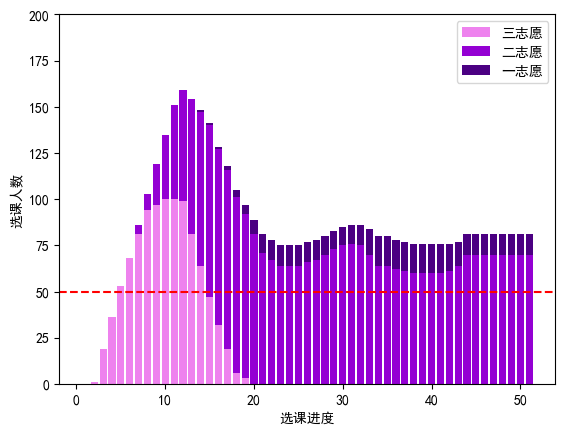

In [ ]:
# 导入第三方数据库
import matplotlib as mpl
import matplotlib.pyplot as plt

# 字体与负号参数配置
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

# 创建数组x，长度与first_record相同，元素从1开始增加
print(first_record)
length = first_record.size
print(length)
x = np.arange(1, first_record.size+1)
print(x)

# 强制调整一下数据
first_record[0] = 0
second_record[0] = 0
third_record[0] = 0

# 绘制图形
plt.bar(x,third_record,color='violet',label='三志愿')
plt.bar(x,second_record,color='darkviolet',bottom=third_record,label='二志愿')
plt.bar(x,first_record,color='indigo',bottom=second_record+third_record,label='一志愿')

# 画一条红色横线，高度为课容量
plt.axhline(y=max_student, color='r', linestyle='--')

# plt.xlim(0, 55)  # X 轴的范围
plt.ylim(0, 200)  # Y 轴的范围

# 设置x,y轴标签
plt.xlabel('选课进度')
plt.ylabel('选课人数')

# 显示图例
plt.legend()

# 展示图形
plt.show()

Change `average_reward` to get different results.